Enter the recursion depth (default: 4): 3
Enter the scale (default: 10): 
Choose a starting shape: triangle, square, pentagon, or circle.
Enter the starting shape (default: triangle): square


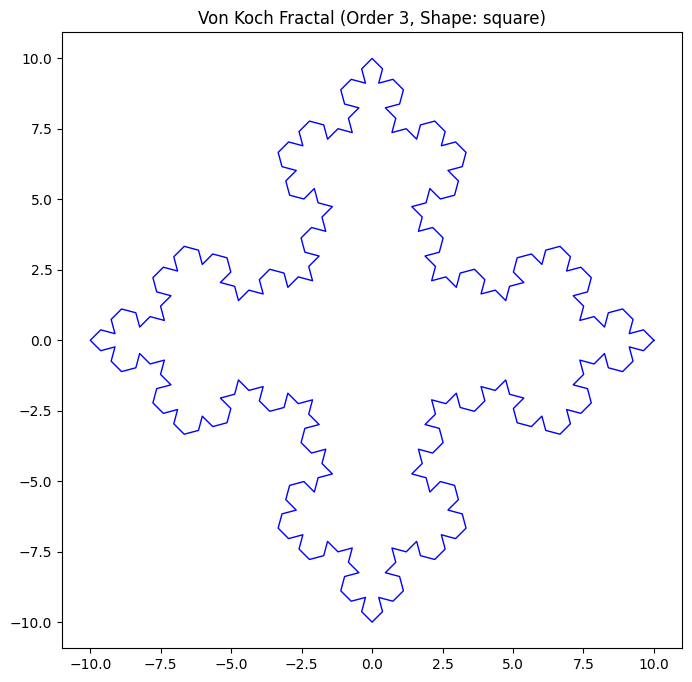

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

def koch_snowflake(order, scale=10, initial_shape="triangle"):
    """
    Generate a Von Koch fractal with customizable starting shapes.

    Args:
        order (int): Recursive depth.
        scale (float): Scale of the fractal.
        initial_shape (str): The starting shape (e.g., "triangle", "square", "pentagon").

    Returns:
        np.ndarray: Complex points of the fractal.

    """
    def koch_recursion(points, depth):
        if depth == 0:
            return points
        new_points = []
        for i in range(len(points) - 1):
            p1, p2 = points[i], points[i + 1]
            segment = (p2 - p1) / 3
            p3 = p1 + segment
            p4 = p3 + segment * np.exp(1j * np.pi / 3)  # Rotate by 60 degrees
            p5 = p1 + 2 * segment
            new_points.extend([p1, p3, p4, p5])
        new_points.append(points[-1])
        return koch_recursion(new_points, depth - 1)

    # Generate initial points for the selected shape
    if initial_shape == "triangle":
        angles = np.array([0, 2 * np.pi / 3, 4 * np.pi / 3, 0])
    elif initial_shape == "square":
        angles = np.array([0, np.pi / 2, np.pi, 3 * np.pi / 2, 0])
    elif initial_shape == "pentagon":
        angles = np.linspace(0, 2 * np.pi, 6)  # 5 sides + closing point
    elif initial_shape == "circle":
        n_points = 100  # Number of points to approximate the circle
        angles = np.linspace(0, 2 * np.pi, n_points)
    else:
        raise ValueError("Invalid shape. Choose from 'triangle', 'square', 'pentagon', or 'circle'.")

    points = scale * np.exp(1j * angles)  # Convert angles to complex numbers
    return np.array(koch_recursion(points, order))

def plot_koch_snowflake(order, scale=10, initial_shape="triangle"):
    """
    Plot the Von Koch fractal.

    Args:
        order (int): Recursive depth.
        scale (float): Scale of the fractal.
        initial_shape (str): The starting shape.
    """
    snowflake = koch_snowflake(order, scale, initial_shape)
    plt.figure(figsize=(8, 8))
    plt.plot(snowflake.real, snowflake.imag, color='blue', lw=1)
    plt.axis('equal')
    plt.title(f"Von Koch Fractal (Order {order}, Shape: {initial_shape})")
    plt.show()

# Add user input
def main():
    try:
        order = int(input("Enter the recursion depth (default: 4): ") or 4)
        scale = float(input("Enter the scale (default: 10): ") or 10.0)
        print("Choose a starting shape: triangle, square, pentagon, or circle.")
        initial_shape = input("Enter the starting shape (default: triangle): ").strip().lower() or "triangle"

        if initial_shape not in ["triangle", "square", "pentagon", "circle"]:
            raise ValueError("Invalid shape selection.")

        plot_koch_snowflake(order, scale, initial_shape)
    except ValueError as e:
        print(f"Invalid input: {e}")

if __name__ == "__main__":
    main()